In [1]:
%cd ../..

/home/dmoreno/ATAT_ZTF/elasticc_one


# Confusion matrices

In [2]:
import os
import json 
import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

/home/dmoreno/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [23]:
path_data = './data/datasets/ZTF_ff/final/LC_MD_FEAT_v3_fixed_windows_200'
path_results = './results/ZTF_ff/LC/lc_mta_v3_fixed_windows/MTA'
time_to_eval = 2048

order_classes = ['SNIa', # yes
                 'SNIbc', # yes
                 'SNIIb', # yes
                 'SNII', # yes
                 'SNIIn', # yes
                 'SLSN', # yes
                 'TDE', # yes
                 'Microlensing', # yes
                 'QSO', 
                 'AGN', # yes
                 'Blazar', 
                 'YSO', 
                 'CV/Nova', 
                 'LPV', 
                 'EA', 
                 'EB/EW', # yes
                 'Periodic-Other', 
                 'RSCVn', 
                 'CEP', 
                 'RRLab', 
                 'RRLc', 
                 'DSCT']

In [24]:
code_dict = {
        0: "SNIa",
        1: "SNIbc",
        2: "SNIIb",
        3: "SNII",
        4: "SNIIn",
        5: "SLSN",
        6: "TDE",
        7: "Microlensing",
        8: "QSO",
        9: "AGN",
        10: "Blazar",
        11: "YSO",
        12: "CV/Nova",
        13: "LPV",
        14: "EA",
        15: "EB/EW",
        16: "Periodic-Other",
        17: "RSCVn",
        18: "CEP",
        19: "RRLab",
        20: "RRLc",
        21: "DSCT",
    }

code_dict_a = {
        0: "Transient",
        1: "Transient",
        2: "Transient",
        3: "Transient",
        4: "Transient",
        5: "Transient",
        6: "Transient",
        7: "Transient",
        8: "Stochastic",
        9: "Stochastic",
        10: "Stochastic",
        11: "Stochastic",
        12: "Stochastic",
        13: "Periodic",
        14: "Periodic",
        15: "Periodic",
        16: "Periodic",
        17: "Periodic",
        18: "Periodic",
        19: "Periodic",
        20: "Periodic",
        21: "Periodic",
    }

In [25]:
objects_partitions = pd.read_parquet('./data/datasets/ZTF_ff/partitions/v3/partitions.parquet')
obj_label = objects_partitions[objects_partitions['partition'] == 'test']
y_real_test = obj_label['alerceclass'].values
obj_label = ['aid_{}'.format(x) for x in obj_label['oid'].values]
obj_label

['aid_ZTF18adldhip',
 'aid_ZTF19aasbgeb',
 'aid_ZTF18aayfbqd',
 'aid_ZTF19ablyzbl',
 'aid_ZTF18actabfv',
 'aid_ZTF18aaztkvq',
 'aid_ZTF21aaphzsw',
 'aid_ZTF19aarhrcv',
 'aid_ZTF17aaajmxw',
 'aid_ZTF18acrvact',
 'aid_ZTF22aaahdyl',
 'aid_ZTF18aacebav',
 'aid_ZTF19abnqhwd',
 'aid_ZTF19abjgdow',
 'aid_ZTF18abklljv',
 'aid_ZTF18aalaphh',
 'aid_ZTF23aaaziou',
 'aid_ZTF17aacihzd',
 'aid_ZTF22abnmzar',
 'aid_ZTF17aaaoite',
 'aid_ZTF18abcurfb',
 'aid_ZTF18adbbyzu',
 'aid_ZTF18aaxpqts',
 'aid_ZTF18aacgwxk',
 'aid_ZTF18admcecv',
 'aid_ZTF18abukrnx',
 'aid_ZTF19aapuibt',
 'aid_ZTF18aawccep',
 'aid_ZTF21aahfpup',
 'aid_ZTF19aaoztzf',
 'aid_ZTF18aayijfg',
 'aid_ZTF18abgpcbj',
 'aid_ZTF18abwbiev',
 'aid_ZTF18actawil',
 'aid_ZTF20abyzomt',
 'aid_ZTF17aabxqbf',
 'aid_ZTF18abukymf',
 'aid_ZTF18abvbsoc',
 'aid_ZTF18actunfi',
 'aid_ZTF18aazfeau',
 'aid_ZTF22aaayewi',
 'aid_ZTF18aaxtcdl',
 'aid_ZTF18abtoxjw',
 'aid_ZTF18acdpxfb',
 'aid_ZTF18aabvmax',
 'aid_ZTF18abbogne',
 'aid_ZTF18aapnlus',
 'aid_ZTF18ab

In [26]:
y_real_test.shape

(8346,)

In [27]:
len(obj_label)

8346

In [28]:
import yaml

def load_yaml(path):
    with open(path, 'r') as file:
        args = yaml.load(file, Loader=yaml.FullLoader)
    return args

dict_info = load_yaml('{}/dict_info.yaml'.format(path_data))

mapping_classes = dict_info['mapping_classes']
mapping_classes_inverted = {v: k for k, v in mapping_classes.items()}
print(mapping_classes_inverted)

{0: 'AGN', 8: 'Blazar', 12: 'CEP', 5: 'CV/Nova', 15: 'DSCT', 2: 'EA', 10: 'EB/EW', 11: 'LPV', 21: 'Microlensing', 14: 'Periodic-Other', 1: 'QSO', 13: 'RRLab', 6: 'RRLc', 7: 'RSCVn', 17: 'SLSN', 9: 'SNII', 19: 'SNIIb', 20: 'SNIIn', 4: 'SNIa', 16: 'SNIbc', 18: 'TDE', 3: 'YSO'}


In [29]:
def sort_dict_by_value(d, reverse=False):
    return dict(sorted(d.items(), key=lambda x: x[1], reverse=reverse))

sort_classes = list(sort_dict_by_value(mapping_classes).keys())
print(sort_classes)

['AGN', 'QSO', 'EA', 'YSO', 'SNIa', 'CV/Nova', 'RRLc', 'RSCVn', 'Blazar', 'SNII', 'EB/EW', 'LPV', 'CEP', 'RRLab', 'Periodic-Other', 'DSCT', 'SNIbc', 'SLSN', 'TDE', 'SNIIb', 'SNIIn', 'Microlensing']


In [30]:
combined_dict = {}
for key, class_name in mapping_classes_inverted.items():
    # Buscar el código en code_dict
    for code, name in code_dict.items():
        if name == class_name:
            # Obtener el tipo de code_dict_a
            type_name = code_dict_a[code]
            # Agregar al nuevo diccionario con el nombre como llave
            combined_dict[class_name] = type_name
            break

combined_dict

{'AGN': 'Stochastic',
 'Blazar': 'Stochastic',
 'CEP': 'Periodic',
 'CV/Nova': 'Stochastic',
 'DSCT': 'Periodic',
 'EA': 'Periodic',
 'EB/EW': 'Periodic',
 'LPV': 'Periodic',
 'Microlensing': 'Transient',
 'Periodic-Other': 'Periodic',
 'QSO': 'Stochastic',
 'RRLab': 'Periodic',
 'RRLc': 'Periodic',
 'RSCVn': 'Periodic',
 'SLSN': 'Transient',
 'SNII': 'Transient',
 'SNIIb': 'Transient',
 'SNIIn': 'Transient',
 'SNIa': 'Transient',
 'SNIbc': 'Transient',
 'TDE': 'Transient',
 'YSO': 'Stochastic'}

In [32]:
predictions = torch.load('{}/all_predictions_times.pt'.format(path_results))
predictions

{'SNID': array([b'ZTF17aaaecgi_0', b'ZTF17aaaecgi_1', b'ZTF17aaaecgi_2', ...,
        b'ZTF23abcvqkd_3', b'ZTF23abcvqkd_4', b'ZTF23abcvqkd_5'],
       dtype=object),
 'y_test': tensor([10, 10, 10,  ...,  4,  4,  4]),
 'list_y_pred': {'test_16': array([10, 10, 10, ..., 19,  4,  4]),
  'test_32': array([10, 10, 10, ..., 19,  5,  5]),
  'test_64': array([10, 10, 10, ...,  4,  5,  4]),
  'test_128': array([10, 10, 10, ...,  4, 16,  4]),
  'test_256': array([10, 10, 10, ...,  4,  4,  4]),
  'test_512': array([10, 10, 10, ...,  4,  4,  4]),
  'test_1024': array([10, 10, 10, ...,  4,  4,  4]),
  'test_2048': array([10, 10, 10, ...,  4,  4,  4])},
 'list_y_pred_prob': {'test_16': array([[8.4793952e-05, 1.2224992e-05, 2.6991612e-01, ..., 4.0650736e-10,
          1.7243107e-07, 9.9660544e-11],
         [7.6367014e-06, 2.0773650e-06, 1.1339428e-01, ..., 2.2705014e-10,
          2.9960218e-10, 6.0675543e-16],
         [2.2964524e-07, 3.8970256e-08, 3.2629762e-02, ..., 3.3718645e-10,
          2.18

In [33]:
# Procesamiento para agregar los índices correspondientes
from itertools import groupby

# Convertir bytes a str para facilitar la manipulación
snids_str = [snid.decode("utf-8") for snid in predictions['SNID']]

# Función para extraer el identificador base de cada SNID
def base_id(snid):
    return "_".join(snid.split("_")[:-1])

# Agrupar por el identificador base
grouped = groupby(range(len(snids_str)), key=lambda x: base_id(snids_str[x]))

# Crear la nueva clave con los índices agrupados
idx_windows_objects = [list(group) for _, group in grouped]

# Crear la clave 'idx_unique_y_test' con los índices del SNID 0 de todos los objetos
idx_unique_y_test = []
ids_unique_real = []

for i, snid in enumerate(snids_str):
    if snid.endswith("_0"):
        idx_unique_y_test.append(i)
        ids_unique_real.append('aid_{}'.format(snid.split('_')[0]))

# Mostrar el resultado
print('length: ', len(idx_windows_objects))
print('length: ', len(idx_unique_y_test))

length:  41728
length:  41728


In [34]:
print(ids_unique_real)
print(len(ids_unique_real))

['aid_ZTF17aaaecgi', 'aid_ZTF17aaaedvi', 'aid_ZTF17aaafglk', 'aid_ZTF17aaafiut', 'aid_ZTF17aaafiww', 'aid_ZTF17aaafyis', 'aid_ZTF17aaafyxs', 'aid_ZTF17aaagryq', 'aid_ZTF17aaaidzt', 'aid_ZTF17aaaizfv', 'aid_ZTF17aaakbvl', 'aid_ZTF17aaaorgv', 'aid_ZTF17aaaowhs', 'aid_ZTF17aaaqtul', 'aid_ZTF17aaarxab', 'aid_ZTF17aaarxbz', 'aid_ZTF17aaarzye', 'aid_ZTF17aaasboc', 'aid_ZTF17aaasklh', 'aid_ZTF17aaatgma', 'aid_ZTF17aaatkxt', 'aid_ZTF17aaatlhi', 'aid_ZTF17aaauijj', 'aid_ZTF17aaaweng', 'aid_ZTF17aaawqzp', 'aid_ZTF17aabhlnm', 'aid_ZTF17aabooqt', 'aid_ZTF17aabootn', 'aid_ZTF17aabopzp', 'aid_ZTF17aaboqfs', 'aid_ZTF17aabppsz', 'aid_ZTF17aabppwh', 'aid_ZTF17aabqidu', 'aid_ZTF17aabummz', 'aid_ZTF17aabupde', 'aid_ZTF17aabuphg', 'aid_ZTF17aabuuyx', 'aid_ZTF17aabuvjm', 'aid_ZTF17aabvgfc', 'aid_ZTF17aabviic', 'aid_ZTF17aabxamk', 'aid_ZTF17aabxkhe', 'aid_ZTF17aacgwpq', 'aid_ZTF17aackses', 'aid_ZTF17aactvce', 'aid_ZTF17aadgwyo', 'aid_ZTF17aadidmw', 'aid_ZTF17aadjkhd', 'aid_ZTF17aadooax', 'aid_ZTF18aaaajiw',

In [35]:
# Calcular el promedio de las probabilidades para cada conjunto de ventanas

predictions.update({
    'list_y_pred_prob_avg': dict(),
    'list_y_pred_avg': dict(),
    })

for eval_time, predicciones in predictions['list_y_pred_prob'].items():
    predictions['list_y_pred_prob_avg'][eval_time] = [] 
    predictions['list_y_pred_avg'][eval_time] = [] 
    for idx_windows in idx_windows_objects:
        window_probs = predicciones[idx_windows]
        avg_probs = np.mean(window_probs, axis=0)
        predictions['list_y_pred_prob_avg'][eval_time].append(avg_probs)
        predictions['list_y_pred_avg'][eval_time].append(np.argmax(avg_probs, axis=0))

    predictions['list_y_pred_prob_avg'][eval_time] = np.array(predictions['list_y_pred_prob_avg'][eval_time])
    predictions['list_y_pred_avg'][eval_time] = np.array(predictions['list_y_pred_avg'][eval_time])

predictions['list_y_pred_avg']

{'test_16': array([10, 11,  5, ..., 20,  4,  4]),
 'test_32': array([10, 11,  5, ...,  4,  4,  9]),
 'test_64': array([10, 11,  5, ..., 20,  4,  4]),
 'test_128': array([10, 11,  5, ..., 20,  4,  4]),
 'test_256': array([10, 11,  5, ..., 20,  4,  4]),
 'test_512': array([10, 11,  5, ..., 20,  4,  4]),
 'test_1024': array([10, 11,  5, ..., 20,  4,  4]),
 'test_2048': array([10, 11,  5, ..., 20,  4,  4])}

In [36]:
predictions['list_y_pred_avg']['test_2048'].shape

(41728,)

In [37]:
predictions.keys()

dict_keys(['SNID', 'y_test', 'list_y_pred', 'list_y_pred_prob', 'list_y_pred_prob_avg', 'list_y_pred_avg'])

In [38]:
predictions['y_test'].shape

torch.Size([252810])

In [39]:
predictions['SNID'].shape

(252810,)

In [40]:
print(idx_unique_y_test)

[0, 8, 16, 21, 30, 38, 46, 54, 57, 62, 67, 74, 80, 84, 96, 101, 106, 113, 119, 124, 128, 132, 139, 144, 155, 164, 168, 177, 189, 200, 209, 218, 227, 235, 245, 255, 263, 271, 279, 288, 295, 304, 310, 314, 319, 320, 325, 330, 334, 338, 341, 347, 354, 363, 370, 377, 384, 392, 395, 402, 408, 415, 422, 430, 438, 445, 453, 462, 472, 479, 488, 494, 500, 504, 511, 515, 530, 543, 548, 554, 561, 572, 585, 597, 610, 622, 635, 642, 654, 662, 671, 678, 693, 706, 713, 719, 724, 734, 742, 746, 756, 772, 781, 788, 794, 802, 811, 819, 826, 835, 843, 847, 859, 867, 879, 894, 898, 907, 915, 922, 930, 939, 946, 953, 961, 970, 979, 988, 997, 1009, 1012, 1019, 1031, 1040, 1051, 1059, 1066, 1074, 1081, 1090, 1097, 1101, 1109, 1117, 1128, 1133, 1140, 1152, 1163, 1170, 1181, 1184, 1192, 1199, 1207, 1211, 1221, 1234, 1241, 1251, 1260, 1267, 1277, 1281, 1289, 1295, 1304, 1310, 1318, 1324, 1328, 1332, 1338, 1350, 1356, 1361, 1368, 1375, 1384, 1392, 1398, 1405, 1413, 1418, 1426, 1434, 1446, 1453, 1459, 1465, 1473,

In [41]:
print(ids_unique_real)

['aid_ZTF17aaaecgi', 'aid_ZTF17aaaedvi', 'aid_ZTF17aaafglk', 'aid_ZTF17aaafiut', 'aid_ZTF17aaafiww', 'aid_ZTF17aaafyis', 'aid_ZTF17aaafyxs', 'aid_ZTF17aaagryq', 'aid_ZTF17aaaidzt', 'aid_ZTF17aaaizfv', 'aid_ZTF17aaakbvl', 'aid_ZTF17aaaorgv', 'aid_ZTF17aaaowhs', 'aid_ZTF17aaaqtul', 'aid_ZTF17aaarxab', 'aid_ZTF17aaarxbz', 'aid_ZTF17aaarzye', 'aid_ZTF17aaasboc', 'aid_ZTF17aaasklh', 'aid_ZTF17aaatgma', 'aid_ZTF17aaatkxt', 'aid_ZTF17aaatlhi', 'aid_ZTF17aaauijj', 'aid_ZTF17aaaweng', 'aid_ZTF17aaawqzp', 'aid_ZTF17aabhlnm', 'aid_ZTF17aabooqt', 'aid_ZTF17aabootn', 'aid_ZTF17aabopzp', 'aid_ZTF17aaboqfs', 'aid_ZTF17aabppsz', 'aid_ZTF17aabppwh', 'aid_ZTF17aabqidu', 'aid_ZTF17aabummz', 'aid_ZTF17aabupde', 'aid_ZTF17aabuphg', 'aid_ZTF17aabuuyx', 'aid_ZTF17aabuvjm', 'aid_ZTF17aabvgfc', 'aid_ZTF17aabviic', 'aid_ZTF17aabxamk', 'aid_ZTF17aabxkhe', 'aid_ZTF17aacgwpq', 'aid_ZTF17aackses', 'aid_ZTF17aactvce', 'aid_ZTF17aadgwyo', 'aid_ZTF17aadidmw', 'aid_ZTF17aadjkhd', 'aid_ZTF17aadooax', 'aid_ZTF18aaaajiw',

In [42]:
predictions['labels_final'] = predictions['y_test'][idx_unique_y_test]
predictions['ids_final'] = np.array(ids_unique_real)
print(predictions['labels_final'].shape)

df_atat_pred = []

for eval_time, prob_classes in predictions['list_y_pred_prob_avg'].items():
    df = pd.DataFrame(prob_classes, columns=sort_classes)
    df['shorten'] = str(eval_time.split('_')[-1])
    df.index = predictions['ids_final']
    df_atat_pred.append(df)

df_atat_pred = pd.concat(df_atat_pred)
df_atat_pred

torch.Size([41728])


,AGN,QSO,EA,YSO,SNIa,CV/Nova,RRLc,RSCVn,Blazar,SNII,...,RRLab,Periodic-Other,DSCT,SNIbc,SLSN,TDE,SNIIb,SNIIn,Microlensing,shorten
aid_ZTF17aaaecgi,2.293823e-05,5.931643e-06,8.134943e-02,5.064951e-03,0.000006,3.804646e-03,3.106884e-02,1.562522e-02,4.693004e-05,1.655920e-06,...,7.455982e-03,4.536016e-03,2.586911e-02,1.753962e-08,1.217151e-07,2.721212e-08,7.892659e-07,5.323754e-08,1.867267e-11,16
aid_ZTF17aaaedvi,7.624249e-04,1.690156e-04,1.004712e-02,1.438747e-02,0.000856,1.337942e-02,3.060857e-04,4.016870e-03,8.030676e-04,1.098778e-03,...,1.130306e-03,2.846992e-03,9.340855e-04,1.230749e-05,1.308644e-09,2.632648e-10,1.363405e-12,3.573266e-05,1.262611e-07,16
aid_ZTF17aaafglk,3.210871e-02,3.612971e-02,2.683986e-02,1.396800e-01,0.008927,1.819692e-01,4.190131e-02,6.408639e-02,2.754571e-02,7.118765e-03,...,1.304483e-01,6.362105e-02,1.005836e-01,2.716914e-03,1.240642e-02,5.377466e-03,4.974893e-05,3.489268e-03,9.509973e-06,16
aid_ZTF17aaafiut,1.219406e-02,1.263002e-03,5.921131e-01,4.203749e-02,0.000700,9.537953e-03,3.273000e-03,8.854903e-02,5.094552e-03,4.411106e-03,...,1.300080e-03,1.914467e-03,2.399903e-03,4.176271e-04,2.767412e-09,5.366301e-10,2.052277e-07,9.871105e-06,8.307622e-07,16
aid_ZTF17aaafiww,1.101402e-03,5.449635e-04,1.720299e-01,4.131128e-02,0.000324,1.112926e-02,1.088001e-01,1.091932e-01,1.401548e-03,5.824169e-05,...,4.155465e-02,5.010988e-02,7.614699e-02,4.557832e-05,3.624289e-06,6.579604e-07,4.105565e-06,2.715896e-05,4.159680e-08,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF23aamapva,8.726985e-05,1.408164e-05,6.872582e-05,1.297714e-03,0.000002,1.506512e-03,9.324867e-04,4.421705e-04,5.752505e-06,6.526489e-08,...,2.289673e-04,9.921499e-01,2.517261e-03,5.110937e-10,2.732596e-08,4.469837e-08,1.157198e-12,1.321142e-11,1.350712e-11,2048
aid_ZTF23aamsarj,3.941901e-04,9.135282e-04,1.530222e-02,1.015856e-04,0.129325,1.208271e-01,2.523969e-06,2.420028e-05,1.499446e-04,4.638519e-01,...,5.617712e-06,5.892064e-09,2.394884e-05,4.530197e-03,3.773328e-07,1.884198e-08,2.609640e-01,3.200525e-03,1.114227e-05,2048
aid_ZTF23aamxeoe,8.903039e-07,9.031400e-07,8.147635e-09,3.303559e-09,0.000001,4.092992e-08,9.655142e-10,2.303560e-10,1.019964e-07,1.175238e-06,...,3.776772e-09,2.623879e-09,6.092509e-11,4.752201e-09,5.994213e-14,5.280709e-11,1.845168e-13,9.999958e-01,3.842422e-16,2048
aid_ZTF23aavxvsz,1.172578e-02,8.826073e-03,6.170191e-03,4.645633e-02,0.723256,7.123000e-03,2.483147e-04,1.112544e-03,3.652942e-02,6.787673e-02,...,4.158555e-03,6.826173e-05,5.755773e-05,8.609303e-06,1.970960e-07,4.530041e-02,7.922136e-06,1.136443e-05,1.714110e-05,2048


In [43]:
atat_pred_2048_time_test = df_atat_pred[df_atat_pred['shorten'] == '2048']
atat_pred_2048_time_test = atat_pred_2048_time_test.reindex(obj_label)[sort_classes]
atat_pred_2048_time_test

,AGN,QSO,EA,YSO,SNIa,CV/Nova,RRLc,RSCVn,Blazar,SNII,...,CEP,RRLab,Periodic-Other,DSCT,SNIbc,SLSN,TDE,SNIIb,SNIIn,Microlensing
aid_ZTF18adldhip,0.623471,2.116566e-01,0.010433,0.002445,4.517626e-04,0.014947,0.011682,0.007881,2.077823e-02,4.990030e-04,...,0.000646,0.003420,6.171427e-02,2.811827e-03,8.743599e-03,4.420150e-03,5.439060e-03,4.537981e-08,6.268623e-03,2.080542e-08
aid_ZTF19aasbgeb,0.250137,5.995502e-01,0.000008,0.000004,3.752068e-02,0.001492,0.000039,0.000014,9.521871e-02,1.172994e-02,...,0.000018,0.000141,8.009229e-07,6.555851e-07,4.122134e-03,3.141028e-11,2.477891e-11,7.692974e-13,8.981071e-08,1.144458e-09
aid_ZTF18aayfbqd,0.000093,6.682733e-05,0.527880,0.131108,6.355567e-06,0.000366,0.000054,0.000334,8.644709e-06,2.554523e-06,...,0.002840,0.000022,2.215270e-09,3.213516e-05,1.565506e-07,4.648396e-11,4.130812e-09,1.643092e-09,6.343878e-12,1.122923e-10
aid_ZTF19ablyzbl,0.393699,3.783016e-01,0.000348,0.000012,1.256979e-02,0.013137,0.000300,0.000271,1.046045e-01,9.381361e-02,...,0.000019,0.000412,8.025054e-07,3.295626e-05,1.028086e-03,7.250708e-04,1.752625e-04,3.486572e-11,4.359646e-05,1.871083e-13
aid_ZTF18actabfv,0.001232,3.315755e-05,0.007992,0.966063,3.186971e-04,0.000176,0.000101,0.006764,4.451429e-03,9.451649e-06,...,0.003461,0.000044,4.579974e-03,7.527682e-04,8.214312e-08,3.978615e-10,1.753468e-12,1.560968e-09,2.612139e-07,3.446388e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF18abdlmwe,0.000271,1.472419e-04,0.080159,0.120382,5.151636e-06,0.001188,0.001086,0.008637,7.128998e-04,1.573050e-06,...,0.756419,0.000996,3.581342e-07,6.612694e-06,3.217488e-07,2.102380e-09,4.949682e-11,1.873237e-12,8.411296e-08,2.849754e-07
aid_ZTF18abnueof,0.000001,7.943046e-07,0.000002,0.000003,3.604813e-08,0.001246,0.391425,0.002064,8.283714e-08,5.084140e-09,...,0.147555,0.149676,4.294343e-04,3.075384e-01,5.726218e-08,1.280608e-09,9.325511e-12,4.224077e-10,1.353853e-09,1.866594e-11
aid_ZTF17aaagvih,0.001933,7.192499e-04,0.232905,0.048460,2.060498e-04,0.003836,0.005015,0.010039,4.636752e-03,1.785174e-06,...,0.314399,0.005208,1.775484e-02,1.664858e-04,3.240048e-07,7.404687e-08,6.902172e-08,1.403504e-12,1.138226e-06,3.147010e-12
aid_ZTF17aabpjme,0.000002,8.874367e-07,0.000004,0.000048,5.209904e-06,0.002978,0.019573,0.005241,8.281895e-05,2.348702e-08,...,0.034041,0.909680,1.749220e-05,2.814334e-02,2.057456e-11,8.321536e-08,1.472752e-12,2.622058e-10,6.188892e-13,5.826375e-13


In [44]:
atat_pred_2048_time_test

,AGN,QSO,EA,YSO,SNIa,CV/Nova,RRLc,RSCVn,Blazar,SNII,...,CEP,RRLab,Periodic-Other,DSCT,SNIbc,SLSN,TDE,SNIIb,SNIIn,Microlensing
aid_ZTF18adldhip,0.623471,2.116566e-01,0.010433,0.002445,4.517626e-04,0.014947,0.011682,0.007881,2.077823e-02,4.990030e-04,...,0.000646,0.003420,6.171427e-02,2.811827e-03,8.743599e-03,4.420150e-03,5.439060e-03,4.537981e-08,6.268623e-03,2.080542e-08
aid_ZTF19aasbgeb,0.250137,5.995502e-01,0.000008,0.000004,3.752068e-02,0.001492,0.000039,0.000014,9.521871e-02,1.172994e-02,...,0.000018,0.000141,8.009229e-07,6.555851e-07,4.122134e-03,3.141028e-11,2.477891e-11,7.692974e-13,8.981071e-08,1.144458e-09
aid_ZTF18aayfbqd,0.000093,6.682733e-05,0.527880,0.131108,6.355567e-06,0.000366,0.000054,0.000334,8.644709e-06,2.554523e-06,...,0.002840,0.000022,2.215270e-09,3.213516e-05,1.565506e-07,4.648396e-11,4.130812e-09,1.643092e-09,6.343878e-12,1.122923e-10
aid_ZTF19ablyzbl,0.393699,3.783016e-01,0.000348,0.000012,1.256979e-02,0.013137,0.000300,0.000271,1.046045e-01,9.381361e-02,...,0.000019,0.000412,8.025054e-07,3.295626e-05,1.028086e-03,7.250708e-04,1.752625e-04,3.486572e-11,4.359646e-05,1.871083e-13
aid_ZTF18actabfv,0.001232,3.315755e-05,0.007992,0.966063,3.186971e-04,0.000176,0.000101,0.006764,4.451429e-03,9.451649e-06,...,0.003461,0.000044,4.579974e-03,7.527682e-04,8.214312e-08,3.978615e-10,1.753468e-12,1.560968e-09,2.612139e-07,3.446388e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF18abdlmwe,0.000271,1.472419e-04,0.080159,0.120382,5.151636e-06,0.001188,0.001086,0.008637,7.128998e-04,1.573050e-06,...,0.756419,0.000996,3.581342e-07,6.612694e-06,3.217488e-07,2.102380e-09,4.949682e-11,1.873237e-12,8.411296e-08,2.849754e-07
aid_ZTF18abnueof,0.000001,7.943046e-07,0.000002,0.000003,3.604813e-08,0.001246,0.391425,0.002064,8.283714e-08,5.084140e-09,...,0.147555,0.149676,4.294343e-04,3.075384e-01,5.726218e-08,1.280608e-09,9.325511e-12,4.224077e-10,1.353853e-09,1.866594e-11
aid_ZTF17aaagvih,0.001933,7.192499e-04,0.232905,0.048460,2.060498e-04,0.003836,0.005015,0.010039,4.636752e-03,1.785174e-06,...,0.314399,0.005208,1.775484e-02,1.664858e-04,3.240048e-07,7.404687e-08,6.902172e-08,1.403504e-12,1.138226e-06,3.147010e-12
aid_ZTF17aabpjme,0.000002,8.874367e-07,0.000004,0.000048,5.209904e-06,0.002978,0.019573,0.005241,8.281895e-05,2.348702e-08,...,0.034041,0.909680,1.749220e-05,2.814334e-02,2.057456e-11,8.321536e-08,1.472752e-12,2.622058e-10,6.188892e-13,5.826375e-13


In [45]:
y_pred_test = atat_pred_2048_time_test.idxmax(axis=1).values
y_pred_test

array(['AGN', 'QSO', 'EA', ..., 'LPV', 'RRLab', 'YSO'], dtype=object)

In [46]:
y_real_test

array(['AGN', 'QSO', 'EA', ..., 'YSO', 'RRLab', 'YSO'], dtype=object)

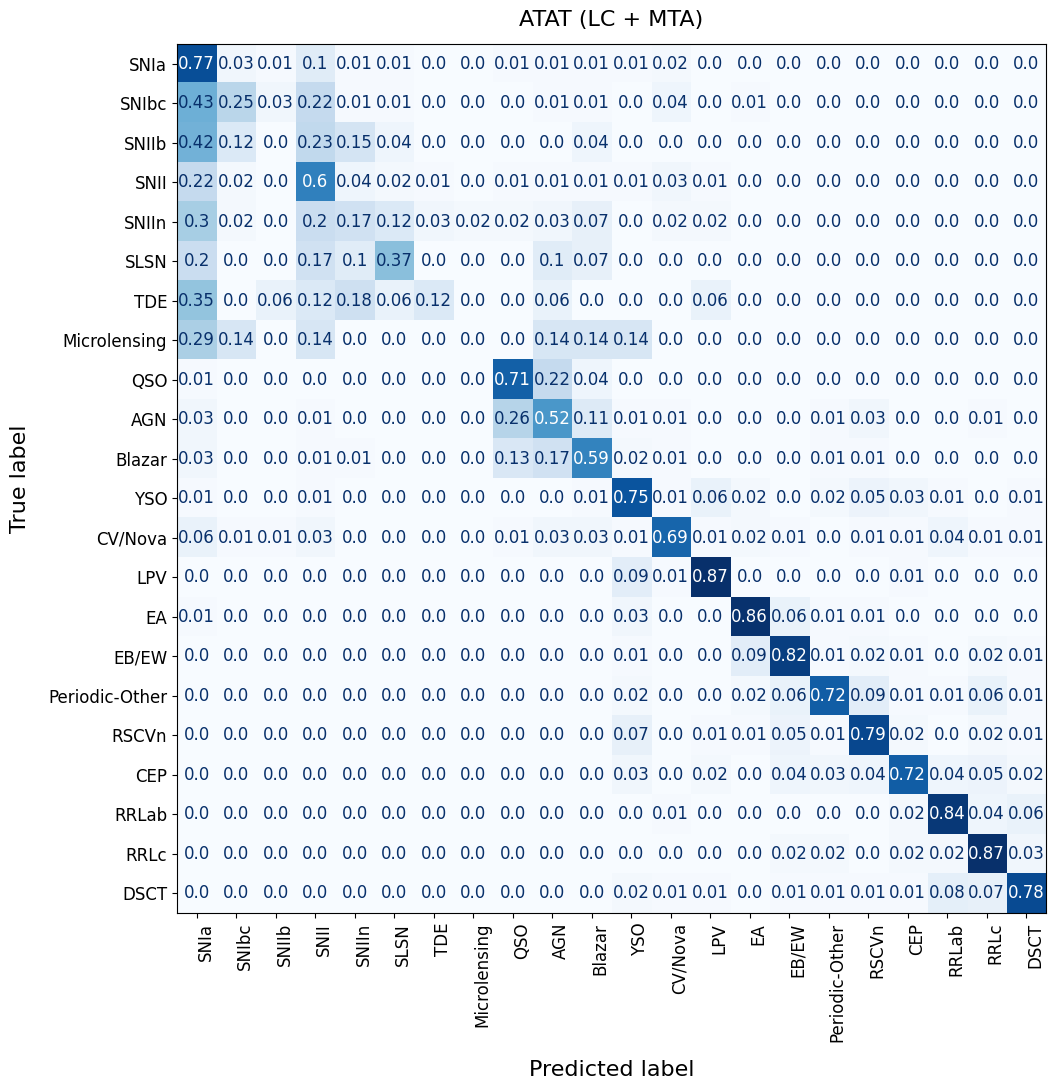

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

fs = 12

cm = confusion_matrix(y_true=y_real_test, y_pred=y_pred_test, labels=order_classes, normalize='true')

cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(11, 11)) #, dpi=110)
im = ax.imshow(np.around(cm, decimals=2), interpolation='nearest', cmap=cmap)

# color map
new_color = cmap(1.0) 

# Añadiendo manualmente las anotaciones con la media y desviación estándar
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] >= 0.005:
            #print(cm[i, j])
            text = f'{np.around(cm[i, j], decimals=2)}'
            color = "white" if cm[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=fs)
        else:
            text = f'{np.around(cm[i, j], decimals=2)}'
            color = "white" if cm[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=fs)

# Ajustes finales y mostrar la gráfica
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(len(order_classes)))
ax.set_yticks(np.arange(len(order_classes)))
ax.set_xticklabels(order_classes)
ax.set_yticklabels(order_classes)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

ax.set_title('ATAT (LC + MTA)', fontsize=16, pad=13)
ax.set_xlabel('Predicted label', fontsize=16, labelpad=13)  # Label del eje x
ax.set_ylabel('True label', fontsize=16, labelpad=13)        # Label del eje y

ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.xaxis.labelpad = 13
ax.yaxis.labelpad = 13

plt.tight_layout()
plt.show()

In [50]:
from sklearn.metrics import f1_score

f1_score(y_real_test, y_pred_test, average='macro')

0.5853309716280104